In [2]:
pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.9/485.9 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 48.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 17.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.9/21.9 MB 34.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 49.3 

In [3]:
from pycaret.classification import *
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score

In [5]:
# define the location of the dataset
#https://raw.githubusercontent.com/username/projectname/branchName/file
url = 'https://raw.githubusercontent.com/aorosoeon/sentinel_2_crop_classification/Simple-chunking-of-SentineLhub-requests/MergeSatData/data/SW-ON-mergedData.csv'
# load the dataset
df = pd.read_csv(url)
# summarize the shape of the dataset
print(df.shape)

(14518, 17)


In [6]:
print(df.columns)

Index(['Latitude', 'Longitude', 'Distance', 'CropType', 'B01', 'B02', 'B03',
       'B04', 'B05', 'B06', 'B07', 'B08', 'B8A', 'B09', 'B10', 'B11', 'B12'],
      dtype='object')


In [7]:
df_new = df[df.columns[3:]]
df_new.rename(columns={'B01':'UltraBlue-443', 'B02':'Blue-490', 'B03':'Green-560', 'B04':'Red-665', 'B05':'VNIR-705', 'B06':'VNIR-740', 'B07':'VNIR-783', 'B08': 'VNIR-842','B8A':'VNIR-865', 'B09':'SWIR-940', 'B10':'SWIR-1375', 'B11':'SWIR-1610', 'B12':'SWIR-2190'}, inplace=True)
df_new_filtered = df_new[df_new['CropType'] != 'Maintained']
df_new_filtered.head()

,CropType,UltraBlue-443,Blue-490,Green-560,Red-665,VNIR-705,VNIR-740,VNIR-783,VNIR-842,VNIR-865,SWIR-940,SWIR-1375,SWIR-1610,SWIR-2190
0,Soybean,92,78,73,82,94,124,144,140,164,40,2,209,132
1,Soybean,92,78,73,85,96,125,144,138,166,40,2,213,133
2,Soybean,92,78,74,85,96,124,145,141,164,40,2,210,133
3,Soybean,92,78,74,87,97,124,147,139,166,40,2,214,134
4,Soybean,83,62,54,34,50,171,236,235,238,55,2,101,42


In [8]:
df_new_filtered.describe()

,UltraBlue-443,Blue-490,Green-560,Red-665,VNIR-705,VNIR-740,VNIR-783,VNIR-842,VNIR-865,SWIR-940,SWIR-1375,SWIR-1610,SWIR-2190
count,14518.000000,14518.000000,14518.000000,14518.000000,14518.000000,14518.000000,14518.000000,14518.000000,14518.000000,14518.000000,14518.000000,14518.000000,14518.000000
mean,85.962460,67.961083,62.590095,46.373261,68.731712,179.413624,212.926987,207.631492,220.664072,57.763879,1.116269,127.027276,64.050558
std,15.863114,18.722614,20.099031,27.139917,25.468925,37.917593,37.406987,41.153264,34.147637,15.716408,0.848020,38.942909,36.917854
min,67.000000,47.000000,34.000000,19.000000,23.000000,30.000000,33.000000,23.000000,28.000000,8.000000,0.000000,7.000000,3.000000
25%,80.000000,60.000000,52.000000,31.000000,52.000000,156.000000,193.000000,182.000000,211.000000,49.000000,1.000000,101.000000,39.000000
50%,82.000000,62.000000,57.000000,35.000000,62.000000,179.000000,235.000000,232.000000,237.000000,56.000000,1.000000,122.000000,52.000000
75%,88.000000,70.000000,67.000000,52.000000,79.000000,204.000000,238.000000,238.000000,240.000000,66.000000,1.000000,146.000000,75.000000
max,246.000000,248.000000,247.000000,249.000000,250.000000,253.000000,255.000000,254.000000,255.000000,238.000000,29.000000,248.000000,242.000000


In [9]:
display(df_new_filtered.isnull().sum())

CropType         0
UltraBlue-443    0
Blue-490         0
Green-560        0
Red-665          0
VNIR-705         0
VNIR-740         0
VNIR-783         0
VNIR-842         0
VNIR-865         0
SWIR-940         0
SWIR-1375        0
SWIR-1610        0
SWIR-2190        0
dtype: int64

<Axes: xlabel='CropType'>

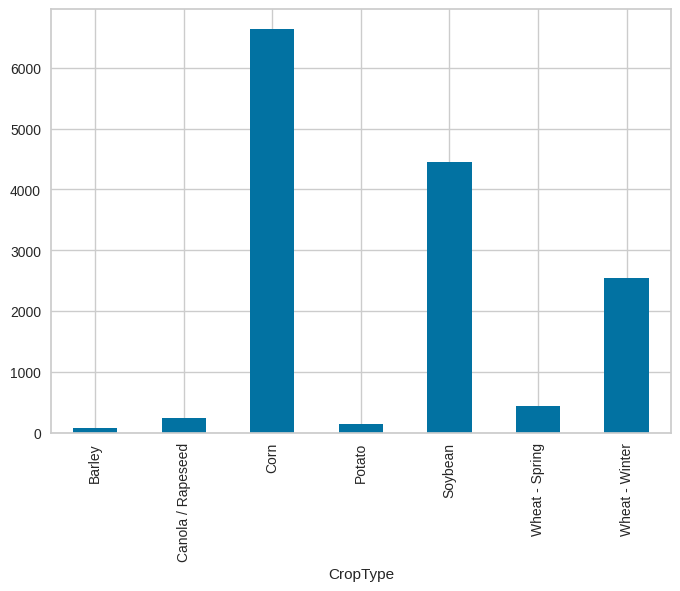

In [10]:
df_count = df_new_filtered.groupby('CropType').count()
df_count = df_count['UltraBlue-443']
df_count.plot.bar()

You can see that our dataset is highly imbalanced.

In [36]:
# setup the dataset
grid = setup(data=df_new_filtered, target='CropType', session_id=123)
get_config()

,Description,Value
0,Session id,123
1,Target,CropType
2,Target type,Multiclass
3,Target mapping,"Barley: 0, Canola / Rapeseed: 1, Corn: 2, Potato: 3, Soybean: 4, Wheat - Spring: 5, Wheat - Winter: 6"
4,Original data shape,"(14518, 14)"
5,Transformed data shape,"(14518, 14)"
6,Transformed train set shape,"(10162, 14)"
7,Transformed test set shape,"(4356, 14)"
8,Numeric features,13
9,Preprocess,True


{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fix_imbalance',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [40]:
# evaluate models and compare models
best_model = compare_models()
# report the best model
print(best_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.6139,0.0000,0.6139,0.6339,0.5933,0.3713,0.3894,1.4560
rf,Random Forest Classifier,0.5986,0.0000,0.5986,0.6153,0.5743,0.3440,0.3624,2.0820
xgboost,Extreme Gradient Boosting,0.5457,0.0000,0.5457,0.5460,0.5191,0.2595,0.2731,1.4020
lightgbm,Light Gradient Boosting Machine,0.5254,0.0000,0.5254,0.5228,0.4862,0.2124,0.2332,5.4650
knn,K Neighbors Classifier,0.4987,0.0000,0.4987,0.4822,0.4763,0.1971,0.2028,0.1530
dt,Decision Tree Classifier,0.4889,0.0000,0.4889,0.4916,0.4897,0.2348,0.2349,0.1420
gbc,Gradient Boosting Classifier,0.4752,0.0000,0.4752,0.4703,0.3796,0.0807,0.1170,10.6480
dummy,Dummy Classifier,0.4569,0.0000,0.4569,0.2088,0.2866,0.0000,0.0000,0.0620
ridge,Ridge Classifier,0.4562,0.0000,0.4562,0.3660,0.2885,0.0003,0.0036,0.0650
lr,Logistic Regression,0.4551,0.0000,0.4551,0.3565,0.2890,-0.0005,-0.0025,2.6980


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)


In [37]:
#Create an object of Extra Tree Classifier (rank 1) model with default settings
et = create_model('et', return_train_score = True)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [66]:
#Evaluate whether et is an overfit model
pred = et.predict(get_config('X_test_transformed'))
print("Accuarcy Score : ",accuracy_score(y_test,pred))

Accuarcy Score :  0.4540863177226814


Extra Trees Classifier model with default settings is overfit.

Now, let's evaluate overfitting with the top 7 algorithms (with gbc with the train accuracy score close to the test accuracy score above).

In [67]:
#Create an object of Random Forest (rank 2) model with default settings
rf = create_model('rf', return_train_score=True)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [68]:
#Evaluate whether rf is an overfit model
pred = rf.predict(get_config('X_test_transformed'))
print("Accuarcy Score : ",accuracy_score(y_test,pred))

Accuarcy Score :  0.453168044077135


Random Forest model with default settings is overfit.

In [43]:
#Create an object of XGBoost model (rank 3) with default settings
xgboost = create_model('xgboost', return_train_score=True)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [45]:
#Evaluate whether xgboost is an overfit model
pred = xgboost.predict(get_config('X_test_transformed'))
print("Accuarcy Score : ",accuracy_score(y_test,pred))

Accuarcy Score :  0.4641873278236915


XG Boost model with default settings is overfit.

In [46]:
#Create an object of Light Gradient Boosting Machine model (rank 4) with default settings
lightgbm = create_model('lightgbm', return_train_score=True)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [47]:
#Evaluate whether lightgbm is an overfit model
pred = lightgbm.predict(get_config('X_test_transformed'))
print("Accuarcy Score : ",accuracy_score(y_test,pred))

Accuarcy Score :  0.4701561065197429


Light Gradient Boosting Machine model with default settings is overfit.

In [48]:
#Create an object of K Nearest Neighbor model (rank 5) with default settings
knn = create_model('knn', return_train_score=True)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [49]:
#Evaluate whether knn is an overfit model
pred = knn.predict(get_config('X_test_transformed'))
print("Accuarcy Score : ",accuracy_score(y_test,pred))

Accuarcy Score :  0.4414600550964187


K Nearest Neighbor model with default settings is overfit.

In [50]:
#Create an object of Decision Trees (rank 6) model with default settings
dt = create_model('dt', return_train_score=True)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [51]:
#Evaluate whether dt is an overfit model
pred = dt.predict(get_config('X_test_transformed'))
print("Accuarcy Score : ",accuracy_score(y_test,pred))

Accuarcy Score :  0.3778696051423324


Decision Trees model with default settings is overfit.

In [52]:
#Create an object of Gradient Boosting Classifier (rank 7) model with default settings
gbc = create_model('gbc', return_train_score=True)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [53]:
#Evaluate whether gbc is an overfit model
pred = gbc.predict(get_config('X_test_transformed'))
print("Accuarcy Score : ",accuracy_score(y_test,pred))

Accuarcy Score :  0.5385674931129476


Gradient Boosting Classifier model with default settings is NOT overfit.

Now, let's try hyperparameter tuning with gbc.

In [54]:
#Since the dataset is highly imbalanced, try hyperparameter tuning to optimize the f1 score instead of accuracy.
tuned_gbc = tune_model(gbc, optimize='f1', choose_better=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5497,0.0000,0.5497,0.5398,0.5369,0.2923,0.2969
1,0.5693,0.0000,0.5693,0.5615,0.5560,0.3204,0.3257
2,0.5531,0.0000,0.5531,0.5509,0.5423,0.2957,0.3006
3,0.5443,0.0000,0.5443,0.5344,0.5286,0.2792,0.2845
4,0.5482,0.0000,0.5482,0.5435,0.5342,0.2846,0.2902
5,0.5374,0.0000,0.5374,0.5220,0.5194,0.2659,0.2713
6,0.5620,0.0000,0.5620,0.5493,0.5442,0.3040,0.3092
7,0.5571,0.0000,0.5571,0.5504,0.5405,0.2941,0.3008
8,0.5984,0.0000,0.5984,0.5909,0.5823,0.3613,0.3697


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [56]:
pred = tuned_gbc.predict(get_config('X_test_transformed'))
print("Accuarcy Score : ",accuracy_score(y_test,pred))

Accuarcy Score :  0.4325068870523416


The tuned gbc model with f1 optimized is overfit.

In [57]:
#Try hyperparameter tuning to optimize accuracy
tuned_gbc2 = tune_model(gbc, choose_better=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5497,0.0000,0.5497,0.5398,0.5369,0.2923,0.2969
1,0.5693,0.0000,0.5693,0.5615,0.5560,0.3204,0.3257
2,0.5531,0.0000,0.5531,0.5509,0.5423,0.2957,0.3006
3,0.5443,0.0000,0.5443,0.5344,0.5286,0.2792,0.2845
4,0.5482,0.0000,0.5482,0.5435,0.5342,0.2846,0.2902
5,0.5374,0.0000,0.5374,0.5220,0.5194,0.2659,0.2713
6,0.5620,0.0000,0.5620,0.5493,0.5442,0.3040,0.3092
7,0.5571,0.0000,0.5571,0.5504,0.5405,0.2941,0.3008
8,0.5984,0.0000,0.5984,0.5909,0.5823,0.3613,0.3697


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [58]:
pred = tuned_gbc2.predict(get_config('X_test_transformed'))
print("Accuarcy Score : ",accuracy_score(y_test,pred))

Accuarcy Score :  0.4325068870523416


The tuned gbc model with accuracy optimized is overfit.

In [61]:
#Go back to Extra Trees model and perform hyperparameter tuning
tuned_et = tune_model(et, choose_better=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4572,0.0000,0.4572,0.3619,0.2886,0.0005,0.0058
1,0.4572,0.0000,0.4572,0.2091,0.2869,0.0000,0.0000
2,0.4577,0.0000,0.4577,0.2095,0.2874,0.0000,0.0000
3,0.4577,0.0000,0.4577,0.5159,0.2885,0.0021,0.0313
4,0.4567,0.0000,0.4567,0.2086,0.2864,0.0000,0.0000
5,0.4567,0.0000,0.4567,0.2086,0.2864,0.0000,0.0000
6,0.4567,0.0000,0.4567,0.2086,0.2864,0.0000,0.0000
7,0.4567,0.0000,0.4567,0.2086,0.2864,0.0000,0.0000
8,0.4567,0.0000,0.4567,0.2086,0.2864,0.0000,0.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [62]:
pred = tuned_et.predict(get_config('X_test_transformed'))
print("Accuarcy Score : ",accuracy_score(y_test,pred))

Accuarcy Score :  0.4540863177226814


In [69]:
tuned_et2 = tune_model(et, optimize='f1', choose_better=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4572,0.0000,0.4572,0.3619,0.2886,0.0005,0.0058
1,0.4572,0.0000,0.4572,0.2091,0.2869,0.0000,0.0000
2,0.4577,0.0000,0.4577,0.2095,0.2874,0.0000,0.0000
3,0.4577,0.0000,0.4577,0.5159,0.2885,0.0021,0.0313
4,0.4567,0.0000,0.4567,0.2086,0.2864,0.0000,0.0000
5,0.4567,0.0000,0.4567,0.2086,0.2864,0.0000,0.0000
6,0.4567,0.0000,0.4567,0.2086,0.2864,0.0000,0.0000
7,0.4567,0.0000,0.4567,0.2086,0.2864,0.0000,0.0000
8,0.4567,0.0000,0.4567,0.2086,0.2864,0.0000,0.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [70]:
pred = tuned_et2.predict(get_config('X_test_transformed'))
print("Accuarcy Score : ",accuracy_score(y_test,pred))

Accuarcy Score :  0.4540863177226814


Tuned et models are not overfit, and tuning with f1 optimized and tuning with accuracy optimized produce the same performance results.

In [ ]:
#Look at the tuner parameters to see which parameters were tuned with which values.
print(tuner)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=Pipeline(memory=Memory(location=None),
                                      steps=[('label_encoding',
                                              TransformerWrapperWithInverse(exclude=None,
                                                                            include=None,
                                                                            transformer=LabelEncoder())),
                                             ('numerical_imputer',
                                              TransformerWrapper(exclude=None,
                                                                 include=['UltraBlue-443',
                                                                          'Blue-490',
                                                                          'Gre...
                                        'actual_estimat

In [71]:
print(tuned_et)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)


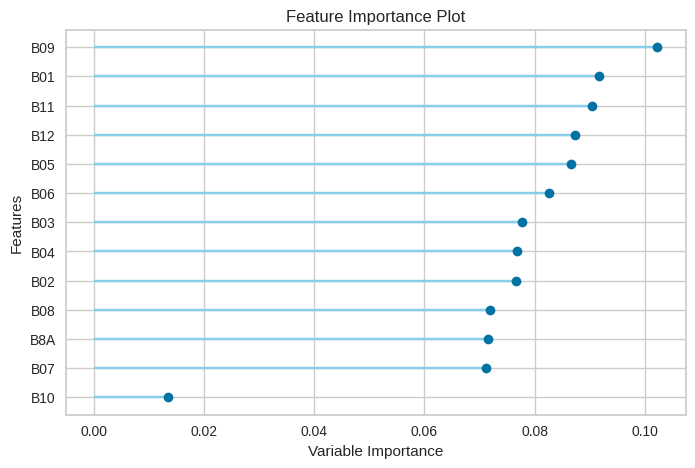

In [72]:
plot_model(tuned_et, plot='feature_all')

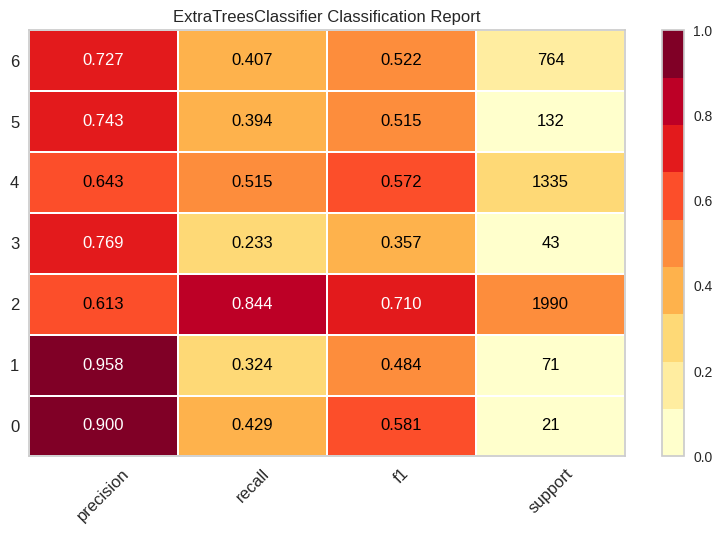

In [64]:
plot_model(tuned_et, plot='class_report')

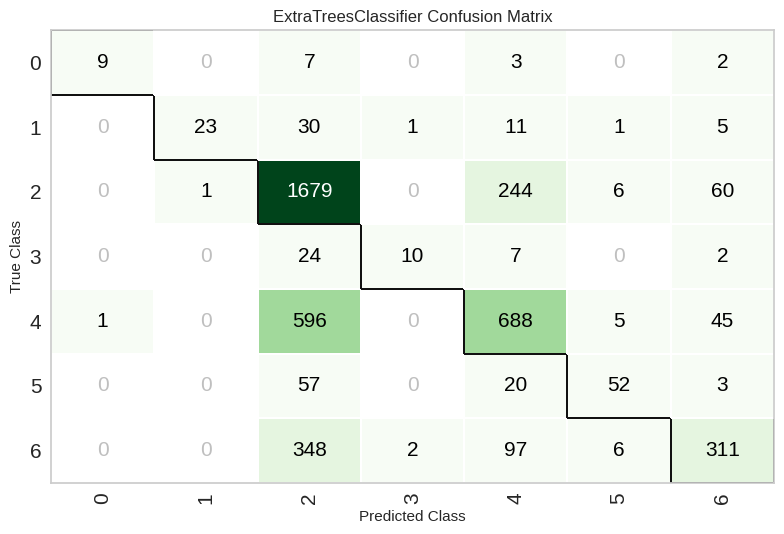

In [65]:
plot_model(tuned_et, plot='confusion_matrix')